In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
#EDA

df.info() #to check null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [6]:
df['benign_0__mal_1'].value_counts()

1    357
0    212
Name: benign_0__mal_1, dtype: int64

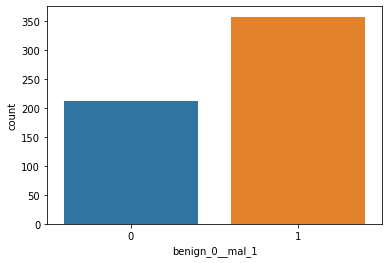

In [7]:
sns.countplot(x='benign_0__mal_1', data=df)

In [8]:
#corr of data
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [9]:
#corr of data with Cancer either Benign or Mal
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

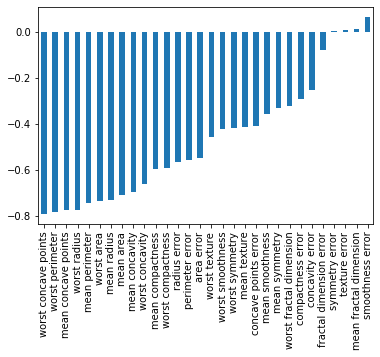

In [10]:
#plot it
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

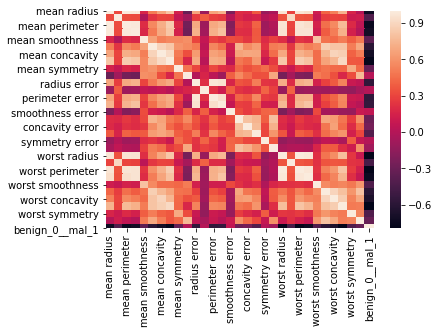

In [11]:
sns.heatmap(df.corr())

In [12]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#we donot do fit in X_test to prevent data leakage
# it uses the parameter from X train fit and transform X_test

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
from tensorflow.keras.layers import Dense, Dropout

In [21]:
X_train.shape

(426, 30)

In [26]:
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

#BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [27]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 1ms/sample - loss: 0.7035 - val_loss: 0.6942
Epoch 2/600
426/426 [==============================] - 0s 70us/sample - loss: 0.6824 - val_loss: 0.6750
Epoch 3/600
426/426 [==============================] - 0s 62us/sample - loss: 0.6611 - val_loss: 0.6528
Epoch 4/600
426/426 [==============================] - 0s 61us/sample - loss: 0.6388 - val_loss: 0.6286
Epoch 5/600
426/426 [==============================] - 0s 67us/sample - loss: 0.6125 - val_loss: 0.5993
Epoch 6/600
426/426 [==============================] - 0s 68us/sample - loss: 0.5822 - val_loss: 0.5648
Epoch 7/600
426/426 [==============================] - 0s 62us/sample - loss: 0.5455 - val_loss: 0.5262
Epoch 8/600
426/426 [==============================] - 0s 73us/sample - loss: 0.5067 - val_loss: 0.4845
Epoch 9/600
426/426 [==============================] - 0s 69us/sample - loss: 0.4655 - val_loss: 0.4390
Epoch 10/600
426/42

426/426 [==============================] - 0s 80us/sample - loss: 0.0577 - val_loss: 0.0930
Epoch 79/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0579 - val_loss: 0.0910
Epoch 80/600
426/426 [==============================] - 0s 62us/sample - loss: 0.0576 - val_loss: 0.0904
Epoch 81/600
426/426 [==============================] - 0s 62us/sample - loss: 0.0579 - val_loss: 0.0905
Epoch 82/600
426/426 [==============================] - 0s 60us/sample - loss: 0.0575 - val_loss: 0.0917
Epoch 83/600
426/426 [==============================] - 0s 60us/sample - loss: 0.0627 - val_loss: 0.0915
Epoch 84/600
426/426 [==============================] - 0s 57us/sample - loss: 0.0612 - val_loss: 0.0936
Epoch 85/600
426/426 [==============================] - 0s 57us/sample - loss: 0.0553 - val_loss: 0.0875
Epoch 86/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0555 - val_loss: 0.1010
Epoch 87/600
426/426 [==============================] - 0s 59us/samp

426/426 [==============================] - 0s 59us/sample - loss: 0.0449 - val_loss: 0.0885
Epoch 156/600
426/426 [==============================] - 0s 65us/sample - loss: 0.0436 - val_loss: 0.0879
Epoch 157/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0421 - val_loss: 0.0962
Epoch 158/600
426/426 [==============================] - 0s 60us/sample - loss: 0.0427 - val_loss: 0.0889
Epoch 159/600
426/426 [==============================] - 0s 64us/sample - loss: 0.0416 - val_loss: 0.0926
Epoch 160/600
426/426 [==============================] - 0s 64us/sample - loss: 0.0444 - val_loss: 0.0940
Epoch 161/600
426/426 [==============================] - 0s 60us/sample - loss: 0.0407 - val_loss: 0.0927
Epoch 162/600
426/426 [==============================] - 0s 57us/sample - loss: 0.0413 - val_loss: 0.0882
Epoch 163/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0418 - val_loss: 0.0886
Epoch 164/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 59us/sample - loss: 0.0309 - val_loss: 0.0881
Epoch 233/600
426/426 [==============================] - 0s 69us/sample - loss: 0.0303 - val_loss: 0.0801
Epoch 234/600
426/426 [==============================] - 0s 60us/sample - loss: 0.0307 - val_loss: 0.0911
Epoch 235/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0308 - val_loss: 0.0836
Epoch 236/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0349 - val_loss: 0.0826
Epoch 237/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0313 - val_loss: 0.0836
Epoch 238/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0298 - val_loss: 0.0832
Epoch 239/600
426/426 [==============================] - 0s 60us/sample - loss: 0.0334 - val_loss: 0.0835
Epoch 240/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0292 - val_loss: 0.0882
Epoch 241/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 61us/sample - loss: 0.0218 - val_loss: 0.0728
Epoch 310/600
426/426 [==============================] - 0s 64us/sample - loss: 0.0212 - val_loss: 0.0808
Epoch 311/600
426/426 [==============================] - 0s 58us/sample - loss: 0.0221 - val_loss: 0.0783
Epoch 312/600
426/426 [==============================] - 0s 58us/sample - loss: 0.0239 - val_loss: 0.0801
Epoch 313/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0242 - val_loss: 0.0777
Epoch 314/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0223 - val_loss: 0.0802
Epoch 315/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0215 - val_loss: 0.0810
Epoch 316/600
426/426 [==============================] - 0s 58us/sample - loss: 0.0214 - val_loss: 0.0780
Epoch 317/600
426/426 [==============================] - 0s 60us/sample - loss: 0.0231 - val_loss: 0.0715
Epoch 318/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 58us/sample - loss: 0.0187 - val_loss: 0.0811
Epoch 387/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0188 - val_loss: 0.0739
Epoch 388/600
426/426 [==============================] - 0s 60us/sample - loss: 0.0172 - val_loss: 0.0860
Epoch 389/600
426/426 [==============================] - 0s 57us/sample - loss: 0.0177 - val_loss: 0.0721
Epoch 390/600
426/426 [==============================] - 0s 60us/sample - loss: 0.0167 - val_loss: 0.0816
Epoch 391/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0197 - val_loss: 0.0763
Epoch 392/600
426/426 [==============================] - 0s 62us/sample - loss: 0.0165 - val_loss: 0.0878
Epoch 393/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0175 - val_loss: 0.0743
Epoch 394/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0192 - val_loss: 0.0916
Epoch 395/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 59us/sample - loss: 0.0110 - val_loss: 0.0832
Epoch 464/600
426/426 [==============================] - 0s 58us/sample - loss: 0.0109 - val_loss: 0.0886
Epoch 465/600
426/426 [==============================] - 0s 60us/sample - loss: 0.0119 - val_loss: 0.0816
Epoch 466/600
426/426 [==============================] - 0s 58us/sample - loss: 0.0107 - val_loss: 0.0845
Epoch 467/600
426/426 [==============================] - 0s 58us/sample - loss: 0.0117 - val_loss: 0.0884
Epoch 468/600
426/426 [==============================] - 0s 58us/sample - loss: 0.0118 - val_loss: 0.0813
Epoch 469/600
426/426 [==============================] - 0s 69us/sample - loss: 0.0121 - val_loss: 0.1028
Epoch 470/600
426/426 [==============================] - 0s 60us/sample - loss: 0.0108 - val_loss: 0.0815
Epoch 471/600
426/426 [==============================] - 0s 58us/sample - loss: 0.0116 - val_loss: 0.1016
Epoch 472/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 62us/sample - loss: 0.0074 - val_loss: 0.0954
Epoch 541/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0075 - val_loss: 0.1034
Epoch 542/600
426/426 [==============================] - 0s 62us/sample - loss: 0.0077 - val_loss: 0.1030
Epoch 543/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0084 - val_loss: 0.1025
Epoch 544/600
426/426 [==============================] - 0s 60us/sample - loss: 0.0074 - val_loss: 0.0945
Epoch 545/600
426/426 [==============================] - 0s 58us/sample - loss: 0.0072 - val_loss: 0.1069
Epoch 546/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0071 - val_loss: 0.0996
Epoch 547/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0079 - val_loss: 0.1146
Epoch 548/600
426/426 [==============================] - 0s 58us/sample - loss: 0.0080 - val_loss: 0.1040
Epoch 549/600
426/426 [==============================] - 0s 

In [28]:
losses=pd.DataFrame(model.history.history)

In [29]:
losses

,loss,val_loss
0,0.703539,0.694207
1,0.682387,0.675010
2,0.661145,0.652752
3,0.638838,0.628562
4,0.612481,0.599319
...,...,...
595,0.006785,0.120499
596,0.005486,0.120218
597,0.005245,0.116610
598,0.005532,0.122382


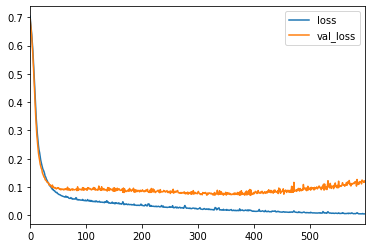

In [33]:
 losses.plot()
    
#dheraii training garera overfit vachha
#so val_loss paila training_loss sangaii drop hunchha
#tara pachhi mathi mathi janchha 
# THIS IS OVERFITTING

## EARLY STOPPING 

In [34]:
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

#BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  Arguments:
 |      monitor: Quantity to be monitored.
 |      min_delta: Minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: Number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: One of `{"auto", "min", "max"}`. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, t

In [38]:
#we need to reduce val_loss to mode = min
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [39]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test),
         callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 1ms/sample - loss: 0.6637 - val_loss: 0.6367
Epoch 2/600
426/426 [==============================] - 0s 79us/sample - loss: 0.6219 - val_loss: 0.6037
Epoch 3/600
426/426 [==============================] - 0s 67us/sample - loss: 0.5868 - val_loss: 0.5685
Epoch 4/600
426/426 [==============================] - 0s 71us/sample - loss: 0.5515 - val_loss: 0.5303
Epoch 5/600
426/426 [==============================] - 0s 70us/sample - loss: 0.5142 - val_loss: 0.4919
Epoch 6/600
426/426 [==============================] - 0s 78us/sample - loss: 0.4775 - val_loss: 0.4535
Epoch 7/600
426/426 [==============================] - 0s 80us/sample - loss: 0.4402 - val_loss: 0.4140
Epoch 8/600
426/426 [==============================] - 0s 79us/sample - loss: 0.4043 - val_loss: 0.3800
Epoch 9/600
426/426 [==============================] - 0s 80us/sample - loss: 0.3759 - val_loss: 0.3535
Epoch 10/600
426/42

426/426 [==============================] - 0s 76us/sample - loss: 0.0534 - val_loss: 0.1300
Epoch 79/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0527 - val_loss: 0.1416
Epoch 80/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0536 - val_loss: 0.1318
Epoch 81/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0536 - val_loss: 0.1336
Epoch 00081: early stopping


In [40]:
#jamma 81 epoch maii kam garyo garyo

In [41]:
model_loss=pd.DataFrame(model.history.history)

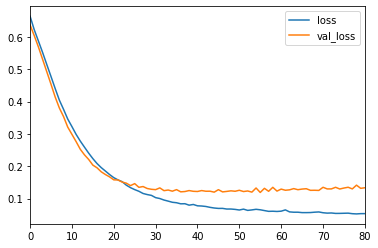

In [43]:
model_loss.plot()
#la yo plot ma ta mathi gako chhaina ni ta.. thikaii chha

## DROPOUT

In [44]:
from tensorflow.keras.layers import Dropout

In [45]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5)) #during each epoch 50% are turned off

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

#BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [46]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test),
         callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 995us/sample - loss: 0.7114 - val_loss: 0.6547
Epoch 2/600
426/426 [==============================] - 0s 79us/sample - loss: 0.6634 - val_loss: 0.6378
Epoch 3/600
426/426 [==============================] - 0s 80us/sample - loss: 0.6447 - val_loss: 0.6171
Epoch 4/600
426/426 [==============================] - 0s 76us/sample - loss: 0.6390 - val_loss: 0.5958
Epoch 5/600
426/426 [==============================] - 0s 75us/sample - loss: 0.6297 - val_loss: 0.5799
Epoch 6/600
426/426 [==============================] - 0s 75us/sample - loss: 0.6030 - val_loss: 0.5579
Epoch 7/600
426/426 [==============================] - 0s 77us/sample - loss: 0.5866 - val_loss: 0.5337
Epoch 8/600
426/426 [==============================] - 0s 78us/sample - loss: 0.5687 - val_loss: 0.5099
Epoch 9/600
426/426 [==============================] - 0s 86us/sample - loss: 0.5383 - val_loss: 0.4826
Epoch 10/600
426/

426/426 [==============================] - 0s 84us/sample - loss: 0.1299 - val_loss: 0.0953
Epoch 79/600
426/426 [==============================] - 0s 87us/sample - loss: 0.1354 - val_loss: 0.0905
Epoch 80/600
426/426 [==============================] - 0s 70us/sample - loss: 0.1113 - val_loss: 0.0820
Epoch 81/600
426/426 [==============================] - 0s 76us/sample - loss: 0.1277 - val_loss: 0.0860
Epoch 82/600
426/426 [==============================] - 0s 72us/sample - loss: 0.1155 - val_loss: 0.1036
Epoch 83/600
426/426 [==============================] - 0s 70us/sample - loss: 0.1168 - val_loss: 0.0900
Epoch 84/600
426/426 [==============================] - 0s 74us/sample - loss: 0.1273 - val_loss: 0.0862
Epoch 85/600
426/426 [==============================] - 0s 69us/sample - loss: 0.1176 - val_loss: 0.0852
Epoch 86/600
426/426 [==============================] - 0s 71us/sample - loss: 0.1067 - val_loss: 0.0890
Epoch 87/600
426/426 [==============================] - 0s 69us/samp

426/426 [==============================] - 0s 92us/sample - loss: 0.0961 - val_loss: 0.0836
Epoch 156/600
426/426 [==============================] - 0s 79us/sample - loss: 0.0702 - val_loss: 0.1018
Epoch 157/600
426/426 [==============================] - 0s 89us/sample - loss: 0.0825 - val_loss: 0.0811
Epoch 158/600
426/426 [==============================] - 0s 78us/sample - loss: 0.0633 - val_loss: 0.0966
Epoch 159/600
426/426 [==============================] - 0s 72us/sample - loss: 0.0754 - val_loss: 0.0948
Epoch 00159: early stopping


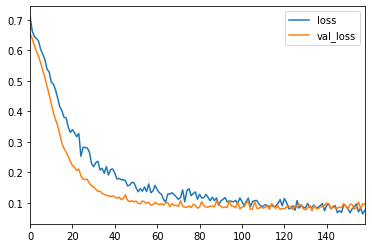

In [47]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

#this is best

In [50]:
pred = model.predict_classes(X_test)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
print(classification_report(y_test,pred ))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        55
           1       0.99      0.94      0.97        88

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [54]:
print(confusion_matrix(y_test, pred))

[[54  1]
 [ 5 83]]
